In [1]:
from cyclegan import CycleGAN
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
gan = CycleGAN()

In [10]:
gan = pickle.load(open('./saved_model/vangogh2photo/obj.pkl', 'rb'))
# gan = pickle.load(open('./saved_model/archive/a2o_1_10_0/obj.pkl', 'rb'))

In [15]:
gan.combined.load_weights('./saved_model/vangogh2photo/model-2.h5')
gan.g_AB.load_weights('./saved_model/vangogh2photo/g_AB-2.h5')
gan.g_BA.load_weights('./saved_model/vangogh2photo/g_BA-2.h5')
gan.d_A.load_weights('./saved_model/vangogh2photo/d_A-2.h5')
gan.d_B.load_weights('./saved_model/vangogh2photo/d_B-2.h5')

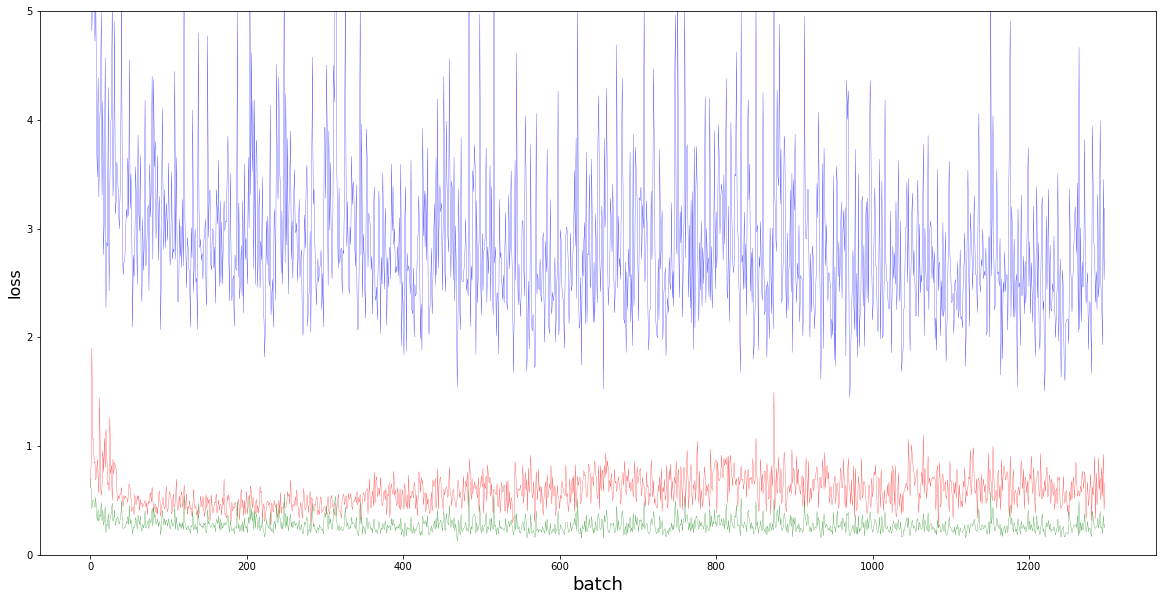

In [11]:
####GENERATOR LOSSES - DOMAIN A

fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='red', linewidth=0.25) #DISCRIM LOSS A
# plt.plot([x[2] for x in gan.g_losses], color='red', linewidth=0.25) #DISCRIM LOSS B
plt.plot([10*x[3] for x in gan.g_losses], color='blue', linewidth=0.25) #CYCLE LOSS A
# plt.plot([10*x[4] for x in gan.g_losses], color='blue', linewidth=0.25) #CYCLE LOSS B
plt.plot([x[5] for x in gan.g_losses], color='green', linewidth=0.25) #ID LOSS A
# plt.plot([x[6] for x in gan.g_losses], color='green', linewidth=0.25) #ID LOSS B


# plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25) #OVERALL LOSS

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)


plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()

In [ ]:
####GENERATOR LOSSES - DOMAIN B

fig = plt.figure(figsize=(20,10))

# plt.plot([x[1] for x in gan.g_losses], color='red', linewidth=0.25) #DISCRIM LOSS A
plt.plot([x[2] for x in gan.g_losses], color='red', linewidth=0.25) #DISCRIM LOSS B
# plt.plot([10*x[3] for x in gan.g_losses], color='blue', linewidth=0.25) #CYCLE LOSS A
plt.plot([10*x[4] for x in gan.g_losses], color='blue', linewidth=0.25) #CYCLE LOSS B
# plt.plot([x[5] for x in gan.g_losses], color='green', linewidth=0.25) #ID LOSS A
plt.plot([x[6] for x in gan.g_losses], color='green', linewidth=0.25) #ID LOSS B

# plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25) #OVERALL LOSS

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)


plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()

In [ ]:
####DISCRIMINATOR LOSSES - DOMAIN A

fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[3] for x in gan.d_losses], color='red', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()


In [ ]:
####DISCRIMINATOR LOSSES - DOMAIN B

fig = plt.figure(figsize=(20,10))

plt.plot([x[4] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[6] for x in gan.d_losses], color='red', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()

In [ ]:
####DISCRIMINATOR LOSSES - OVERALL

fig = plt.figure(figsize=(20,10))

plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()

In [28]:
import os
import numpy as np

def sample_images(self, batch_i):
    os.makedirs('images/%s' % self.dataset_name, exist_ok=True)
    r, c = 2, 4

    # Demo (for GIF)
    imgs_A = self.data_loader.load_img('datasets/vangogh2photo/testA/00658.jpg')
    imgs_B = self.data_loader.load_img('datasets/vangogh2photo/testB/test.jpg')

    # Translate images to the other domain
    fake_B = self.g_AB.predict(imgs_A)
    fake_A = self.g_BA.predict(imgs_B)
    # Translate back to original domain
    reconstr_A = self.g_BA.predict(fake_B)
    reconstr_B = self.g_AB.predict(fake_A)

    # ID the images
    id_A = self.g_BA.predict(imgs_A)
    id_B = self.g_AB.predict(imgs_B)

    gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, id_A, imgs_B, fake_A, reconstr_B, id_B])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    titles = ['Original', 'Translated', 'Reconstructed', 'ID']
    fig, axs = plt.subplots(r, c, figsize=(15,7.5))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i, j].set_title(titles[j])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("images/%s/%d_%d.png" % (self.dataset_name, self.epoch, batch_i))
    plt.close()

In [29]:
sample_images(gan, 999)

In [43]:
gan.d_A.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
instance_normalization_1 (In (None, 64, 64, 128)       2         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       524544    
__________